## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (normal)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_fin_scan_normal'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.06972
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    0.069720
1    0.062293
2    0.060250
3    0.057361
4    0.073272
5    0.064268
6    0.074384
7    0.052288
8    0.065125
9    0.069297
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    0.064826
dtype: float64

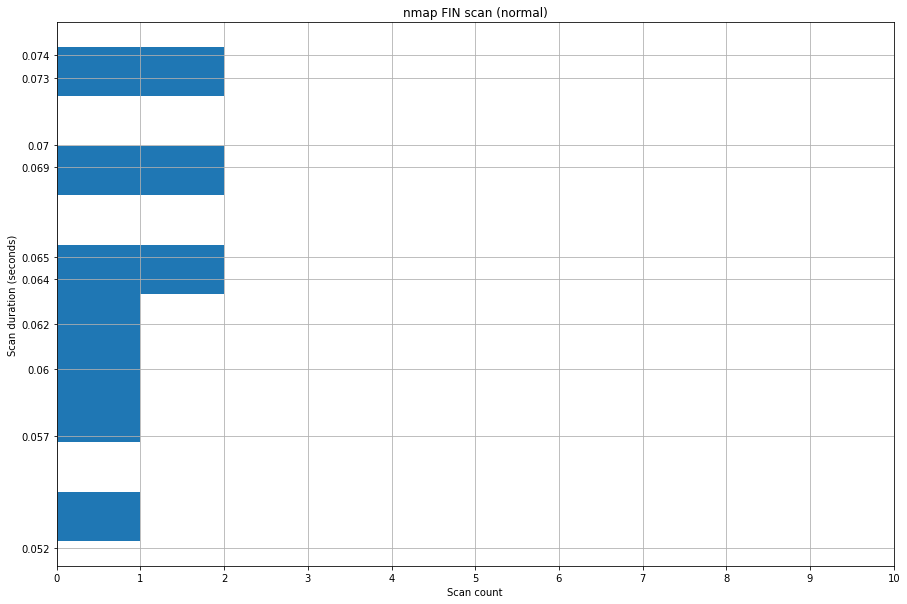

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,0.064826
std,0.007050
min,0.052288
25%,0.060761
50%,0.064697
75%,0.069614
max,0.074384


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1296.5154647827148



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 40567 995
2 40567 80
3 40567 554
4 40567 3306
5 40567 139
6 40567 199
7 40567 22
8 40567 443
9 40567 111
10 40567 135
11 40567 21
12 40567 3389
13 40567 110
14 40567 1723
15 40567 587
16 40567 256
17 40567 113
18 40567 445
19 40567 1720
20 40567 8080
21 40567 1025
22 40567 23
23 40567 143
24 40567 53
25 40567 5900
26 40567 8888
27 40567 25
28 40567 993
29 40567 70
30 40567 1113
31 40567 3333
32 40567 1300
33 40567 5730
34 40567 901
35 40567 1051
36 40567 3801
37 40567 6003
38 40567 32
39 40567 1054
40 40567 9220
41 40567 2161
42 40567 10629
43 40567 800
44 40567 5000
45 40567 1163
46 40567 9917
47 40567 5999
48 40567 1117
49 40567 5811
50 40567 4126
51 40567 9503
52 40567 1033
53 40567 1087
54 40567 683
55 40567 427
56 40567 720
57 40567 3369
58 40567 6346
59 40567 22939
60 40567 1247
61 40567 2382
62 40567 44176
63 40567 1864
64 40567 3404
65 40567 109
66 40567 10628
67 40567 212
68 40567 8652
69 40567 3905
70 40567 2718
71 40567 3551
72 40567 2034
73 40567 11967
74 40567 20221
75 4

580 40567 8383
581 40567 280
582 40567 7019
583 40567 3546
584 40567 1063
585 40567 9943
586 40567 2401
587 40567 1600
588 40567 6025
589 40567 8002
590 40567 3370
591 40567 2710
592 40567 62078
593 40567 1840
594 40567 1192
595 40567 8100
596 40567 900
597 40567 1131
598 40567 8649
599 40567 8007
600 40567 1021
601 40567 1494
602 40567 2557
603 40567 2200
604 40567 1130
605 40567 2811
606 40567 1151
607 40567 1233
608 40567 32772
609 40567 3517
610 40567 7435
611 40567 49154
612 40567 9099
613 40567 9100
614 40567 7000
615 40567 3390
616 40567 3995
617 40567 5877
618 40567 5802
619 40567 24
620 40567 5550
621 40567 5080
622 40567 10617
623 40567 687
624 40567 1042
625 40567 722
626 40567 1132
627 40567 6646
628 40567 54328
629 40567 1782
630 40567 34573
631 40567 6881
632 40567 15000
633 40567 1089
634 40567 3371
635 40567 32771
636 40567 2160
637 40567 2909
638 40567 8082
639 40567 3006
640 40567 5004
641 40567 1972
642 40567 903
643 40567 49156
644 40567 8083
645 40567 1106
646 4056

609 45655 5911
610 45655 64623
611 45655 9535
612 45655 82
613 45655 2144
614 45655 48080
615 45655 5730
616 45655 1063
617 45655 9101
618 45655 2126
619 45655 7921
620 45655 5004
621 45655 1863
622 45655 4443
623 45655 1072
624 45655 9878
625 45655 7937
626 45655 5903
627 45655 44442
628 45655 49400
629 45655 898
630 45655 14238
631 45655 32
632 45655 50000
633 45655 8254
634 45655 17988
635 45655 3071
636 45655 668
637 45655 2006
638 45655 8600
639 45655 9929
640 45655 23502
641 45655 10082
642 45655 119
643 45655 1106
644 45655 5000
645 45655 5550
646 45655 8291
647 45655 2701
648 45655 212
649 45655 777
650 45655 2035
651 45655 5825
652 45655 60020
653 45655 3826
654 45655 9009
655 45655 3211
656 45655 1417
657 45655 10000
658 45655 1198
659 45655 10628
660 45655 999
661 45655 22939
662 45655 3324
663 45655 15003
664 45655 5810
665 45655 49999
666 45655 50300
667 45655 5280
668 45655 2998
669 45655 50006
670 45655 10003
671 45655 2301
672 45655 1914
673 45655 8000
674 45655 49154
6

206 57552 512
207 57552 5000
208 57552 2105
209 57552 2000
210 57552 544
211 57552 9111
212 57552 60443
213 57552 311
214 57552 8008
215 57552 33899
216 57552 873
217 57552 9917
218 57552 7937
219 57552 7
220 57552 9485
221 57552 3551
222 57552 8200
223 57552 1098
224 57552 2043
225 57552 3031
226 57552 4005
227 57552 6689
228 57552 9009
229 57552 1812
230 57552 50800
231 57552 9207
232 57552 6839
233 57552 32780
234 57552 2191
235 57552 1935
236 57552 56737
237 57552 20000
238 57552 65389
239 57552 10778
240 57552 17
241 57552 990
242 57552 3370
243 57552 1040
244 57552 1352
245 57552 9100
246 57552 2160
247 57552 5214
248 57552 16992
249 57552 5718
250 57552 5440
251 57552 2717
252 57552 2103
253 57552 19315
254 57552 1149
255 57552 7000
256 57552 9001
257 57552 9877
258 57552 16001
259 57552 1026
260 57552 2068
261 57552 2605
262 57552 1031
263 57552 497
264 57552 179
265 57552 7443
266 57552 1152
267 57552 4550
268 57552 683
269 57552 3300
270 57552 32769
271 57552 7920
272 57552 1

776 57552 1126
777 57552 1
778 57552 23502
779 57552 44176
780 57552 1047
781 57552 1141
782 57552 2382
783 57552 5811
784 57552 2601
785 57552 6502
786 57552 6789
787 57552 3077
788 57552 1840
789 57552 1234
790 57552 1137
791 57552 65129
792 57552 27715
793 57552 9503
794 57552 6567
795 57552 255
796 57552 49163
797 57552 34573
798 57552 5190
799 57552 2046
800 57552 9594
801 57552 2121
802 57552 2006
803 57552 444
804 57552 541
805 57552 49153
806 57552 10617
807 57552 43
808 57552 1164
809 57552 54328
810 57552 5060
811 57552 6699
812 57552 3995
813 57552 5550
814 57552 3
815 57552 19101
816 57552 5850
817 57552 10621
818 57552 2003
819 57552 3826
820 57552 27000
821 57552 8084
822 57552 1192
823 57552 1434
824 57552 2401
825 57552 38292
826 57552 9103
827 57552 5998
828 57552 9998
829 57552 26
830 57552 4900
831 57552 5054
832 57552 3324
833 57552 8192
834 57552 7103
835 57552 31337
836 57552 32777
837 57552 52848
838 57552 801
839 57552 10000
840 57552 1096
841 57552 646
842 5755

942 40889 3031
943 40889 9091
944 40889 10003
945 40889 51493
946 40889 32777
947 40889 57797
948 40889 4550
949 40889 1043
950 40889 3005
951 40889 1812
952 40889 2557
953 40889 2041
954 40889 555
955 40889 1107
956 40889 84
957 40889 7000
958 40889 3372
959 40889 6547
960 40889 32770
961 40889 56737
962 40889 5859
963 40889 4001
964 40889 10004
965 40889 2009
966 40889 1433
967 40889 458
968 40889 10617
969 40889 32773
970 40889 8383
971 40889 3986
972 40889 1036
973 40889 83
974 40889 8087
975 40889 3945
976 40889 9110
977 40889 9968
978 40889 1066
979 40889 1077
980 40889 464
981 40889 49176
982 40889 1151
983 40889 45100
984 40889 1097
985 40889 5999
986 40889 1000
987 40889 10009
988 40889 2170
989 40889 6346
990 40889 8009
991 40889 1783
992 40889 1086
993 40889 912
994 40889 24800
995 40889 8008
996 40889 8011
997 40889 7106
998 40889 2121
999 40889 425
1000 40889 700
1 42721 995
2 42721 445
3 42721 3306
4 42721 139
5 42721 1723
6 42721 443
7 42721 23
8 42721 135
9 42721 3389
1

108 64871 2604
109 64871 9485
110 64871 1083
111 64871 5298
112 64871 1040
113 64871 5001
114 64871 3551
115 64871 783
116 64871 911
117 64871 27352
118 64871 7512
119 64871 9503
120 64871 125
121 64871 1580
122 64871 49167
123 64871 1065
124 64871 1199
125 64871 5440
126 64871 8292
127 64871 2809
128 64871 1009
129 64871 99
130 64871 5987
131 64871 5051
132 64871 9535
133 64871 1974
134 64871 5050
135 64871 49158
136 64871 1700
137 64871 5825
138 64871 5810
139 64871 593
140 64871 3
141 64871 2393
142 64871 2288
143 64871 2065
144 64871 687
145 64871 8082
146 64871 1112
147 64871 10629
148 64871 7
149 64871 6901
150 64871 5009
151 64871 10025
152 64871 5544
153 64871 1023
154 64871 9500
155 64871 999
156 64871 7937
157 64871 81
158 64871 4004
159 64871 311
160 64871 9011
161 64871 2702
162 64871 30
163 64871 64680
164 64871 563
165 64871 1169
166 64871 6005
167 64871 5800
168 64871 1201
169 64871 2394
170 64871 8086
171 64871 1100
172 64871 3801
173 64871 1024
174 64871 2998
175 64871

775 64871 2968
776 64871 1443
777 64871 5087
778 64871 1010
779 64871 43
780 64871 4125
781 64871 1984
782 64871 6646
783 64871 280
784 64871 301
785 64871 2006
786 64871 3071
787 64871 2200
788 64871 8333
789 64871 7778
790 64871 6839
791 64871 1
792 64871 705
793 64871 4279
794 64871 16018
795 64871 65389
796 64871 45100
797 64871 9220
798 64871 7443
799 64871 23502
800 64871 691
801 64871 1310
802 64871 5666
803 64871 1524
804 64871 2366
805 64871 8089
806 64871 19842
807 64871 2967
808 64871 1148
809 64871 9050
810 64871 2910
811 64871 8093
812 64871 1119
813 64871 55555
814 64871 1433
815 64871 2160
816 64871 50389
817 64871 18040
818 64871 2718
819 64871 3476
820 64871 3493
821 64871 179
822 64871 22939
823 64871 8100
824 64871 1198
825 64871 5357
826 64871 2013
827 64871 2034
828 64871 50003
829 64871 1090
830 64871 6580
831 64871 2607
832 64871 1216
833 64871 4111
834 64871 3920
835 64871 2383
836 64871 2522
837 64871 2222
838 64871 425
839 64871 4449
840 64871 5815
841 64871 1

396 58593 3889
397 58593 1024
398 58593 50006
399 58593 222
400 58593 1163
401 58593 55055
402 58593 61532
403 58593 2717
404 58593 1914
405 58593 3283
406 58593 9485
407 58593 10009
408 58593 19842
409 58593 5904
410 58593 2260
411 58593 1183
412 58593 1105
413 58593 9080
414 58593 548
415 58593 6699
416 58593 19
417 58593 1717
418 58593 9102
419 58593 3367
420 58593 1035
421 58593 1310
422 58593 32778
423 58593 9010
424 58593 2967
425 58593 1044
426 58593 1417
427 58593 5080
428 58593 10002
429 58593 10243
430 58593 4343
431 58593 9001
432 58593 6
433 58593 6059
434 58593 2007
435 58593 5102
436 58593 1033
437 58593 9502
438 58593 1104
439 58593 3261
440 58593 1010
441 58593 2021
442 58593 9968
443 58593 280
444 58593 5560
445 58593 1022
446 58593 5822
447 58593 17877
448 58593 5221
449 58593 11967
450 58593 146
451 58593 646
452 58593 50002
453 58593 32785
454 58593 2049
455 58593 1042
456 58593 464
457 58593 2701
458 58593 5440
459 58593 1236
460 58593 9009
461 58593 8000
462 58593

608 43809 3322
609 43809 32770
610 43809 49161
611 43809 10001
612 43809 14441
613 43809 1556
614 43809 3371
615 43809 5298
616 43809 163
617 43809 5922
618 43809 2967
619 43809 8042
620 43809 3869
621 43809 7070
622 43809 10616
623 43809 3333
624 43809 4550
625 43809 9943
626 43809 8011
627 43809 50389
628 43809 3517
629 43809 5500
630 43809 13
631 43809 11111
632 43809 3527
633 43809 2222
634 43809 1461
635 43809 1862
636 43809 1092
637 43809 1068
638 43809 9898
639 43809 49176
640 43809 366
641 43809 2701
642 43809 55055
643 43809 14442
644 43809 2038
645 43809 30718
646 43809 1041
647 43809 3007
648 43809 4002
649 43809 2323
650 43809 3324
651 43809 1151
652 43809 2522
653 43809 1108
654 43809 6001
655 43809 1149
656 43809 1104
657 43809 2034
658 43809 3128
659 43809 9002
660 43809 16001
661 43809 902
662 43809 9111
663 43809 8400
664 43809 2040
665 43809 9001
666 43809 5862
667 43809 617
668 43809 3370
669 43809 5269
670 43809 11110
671 43809 50006
672 43809 19101
673 43809 27715


274 53678 3052
275 53678 7627
276 53678 1000
277 53678 1082
278 53678 8383
279 53678 9418
280 53678 16016
281 53678 65000
282 53678 1533
283 53678 27356
284 53678 902
285 53678 8086
286 53678 1092
287 53678 3905
288 53678 6129
289 53678 8600
290 53678 33
291 53678 1121
292 53678 13
293 53678 749
294 53678 3851
295 53678 5911
296 53678 6792
297 53678 1137
298 53678 1007
299 53678 444
300 53678 616
301 53678 2043
302 53678 1287
303 53678 2048
304 53678 5550
305 53678 514
306 53678 2381
307 53678 2601
308 53678 9485
309 53678 5850
310 53678 8007
311 53678 6009
312 53678 9071
313 53678 9102
314 53678 425
315 53678 99
316 53678 2002
317 53678 9876
318 53678 32784
319 53678 8654
320 53678 5269
321 53678 2602
322 53678 9502
323 53678 3737
324 53678 20000
325 53678 1084
326 53678 7443
327 53678 1580
328 53678 6025
329 53678 16012
330 53678 3260
331 53678 808
332 53678 49400
333 53678 3889
334 53678 12000
335 53678 7512
336 53678 1002
337 53678 1152
338 53678 5280
339 53678 57294
340 53678 254


440 45355 10629
441 45355 3889
442 45355 16018
443 45355 7001
444 45355 636
445 45355 1718
446 45355 19315
447 45355 1533
448 45355 2170
449 45355 800
450 45355 1130
451 45355 30000
452 45355 1021
453 45355 259
454 45355 1187
455 45355 3869
456 45355 4224
457 45355 5414
458 45355 2492
459 45355 1038
460 45355 843
461 45355 691
462 45355 64623
463 45355 1033
464 45355 8649
465 45355 7004
466 45355 563
467 45355 3766
468 45355 4002
469 45355 2042
470 45355 3703
471 45355 6692
472 45355 6001
473 45355 406
474 45355 10215
475 45355 2702
476 45355 4242
477 45355 3971
478 45355 2034
479 45355 34571
480 45355 5822
481 45355 6668
482 45355 109
483 45355 1080
484 45355 10628
485 45355 2048
486 45355 14441
487 45355 6005
488 45355 2557
489 45355 1088
490 45355 55056
491 45355 7
492 45355 1141
493 45355 2001
494 45355 1057
495 45355 3690
496 45355 1085
497 45355 32782
498 45355 2811
499 45355 5962
500 45355 32783
501 45355 987
502 45355 4899
503 45355 1145
504 45355 8383
505 45355 40193
506 45355

In [15]:
orders_port

,scannr,sport,dport
0,1,40567,995
1,2,40567,80
2,3,40567,554
3,4,40567,3306
4,5,40567,139
...,...,...,...
9995,996,45355,1001
9996,997,45355,524
9997,998,45355,3659
9998,999,45355,8400


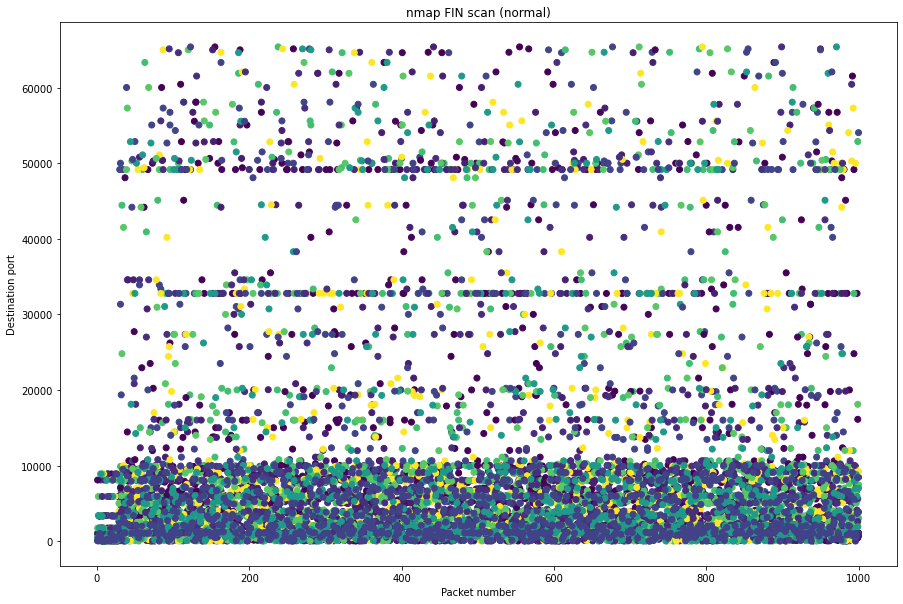

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

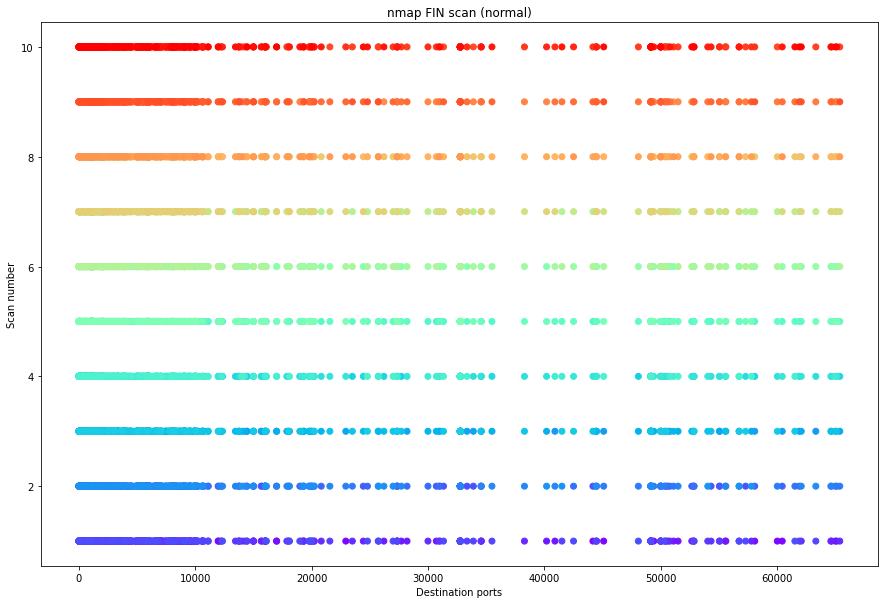

In [19]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [20]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

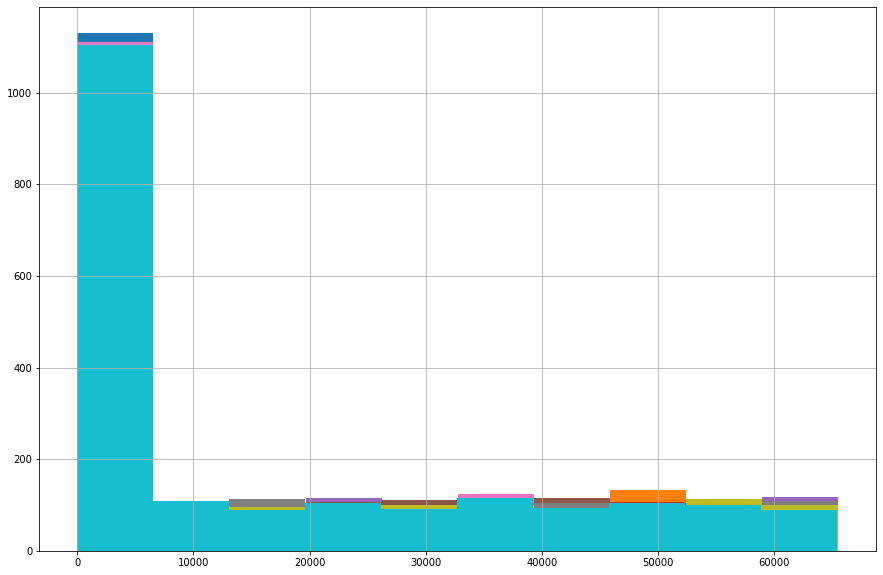

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

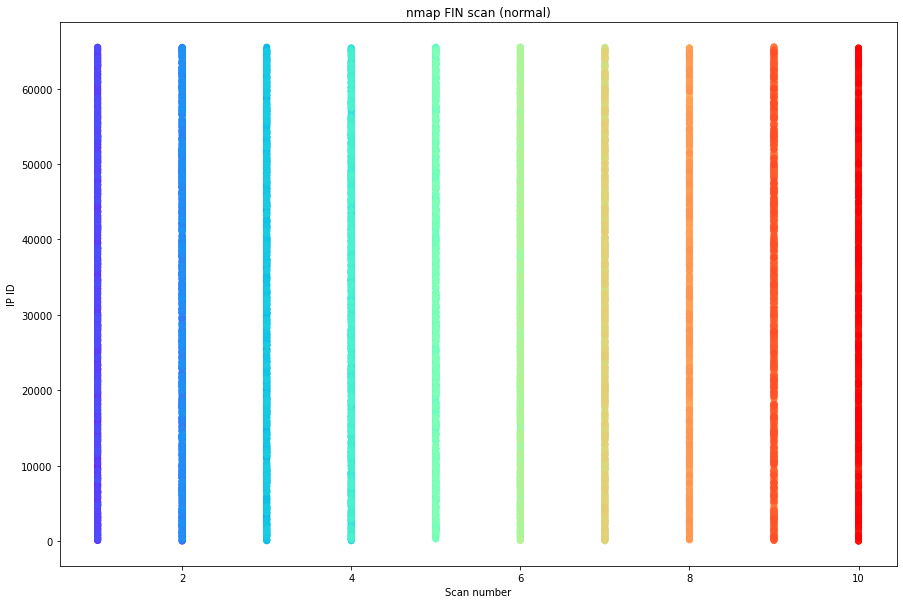

In [25]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

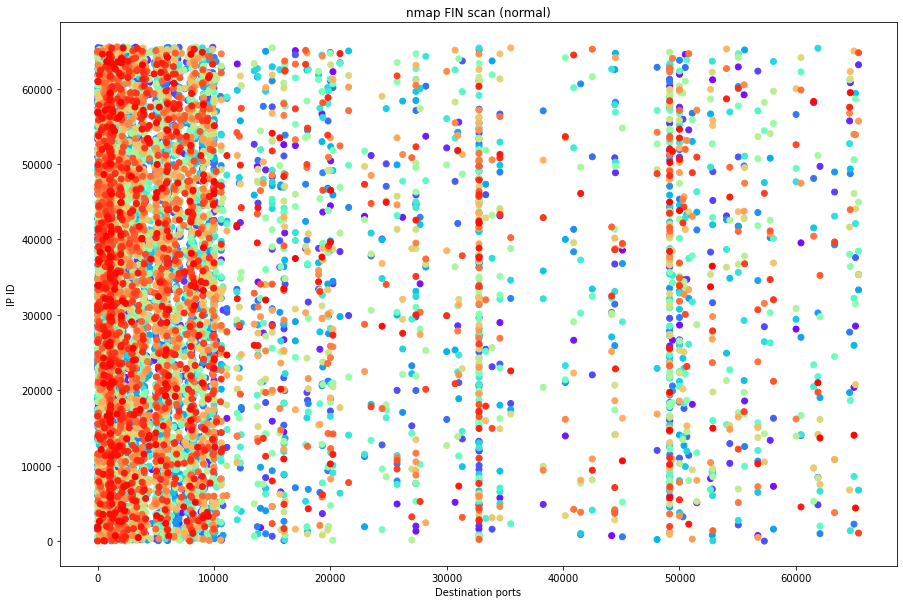

In [26]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))

    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    #plt.scatter(x, ys)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

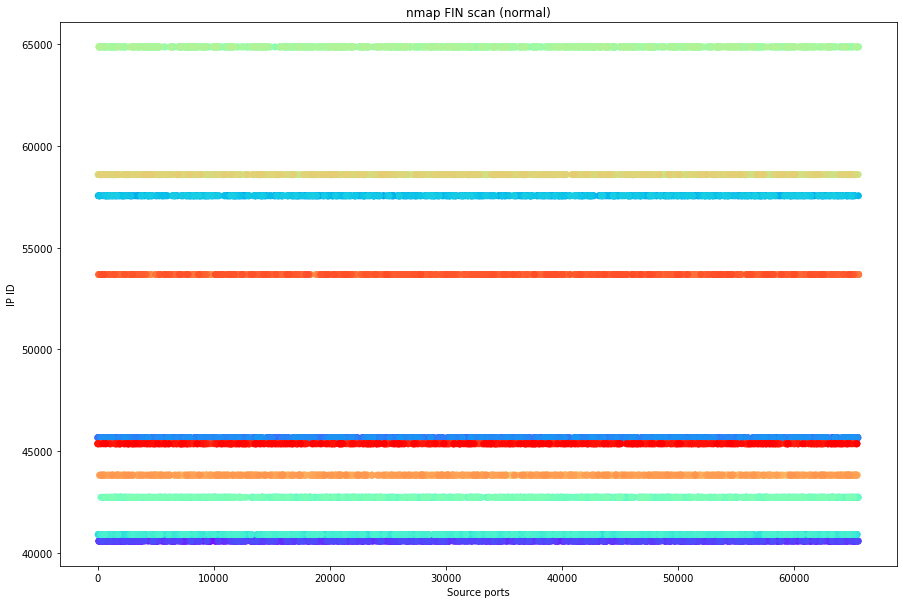

In [27]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 393

Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
Sequence number: 3939565264
-----
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence number: 2343657349
Sequence numbe

Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
Sequence number: 892882725
S

Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 2870032800
Sequence number: 287

Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 2476529206
Sequence number: 247

Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 3728077621
Sequence number: 372

Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
Sequence number: 56655264
-----
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequence number: 4004606766
Sequ

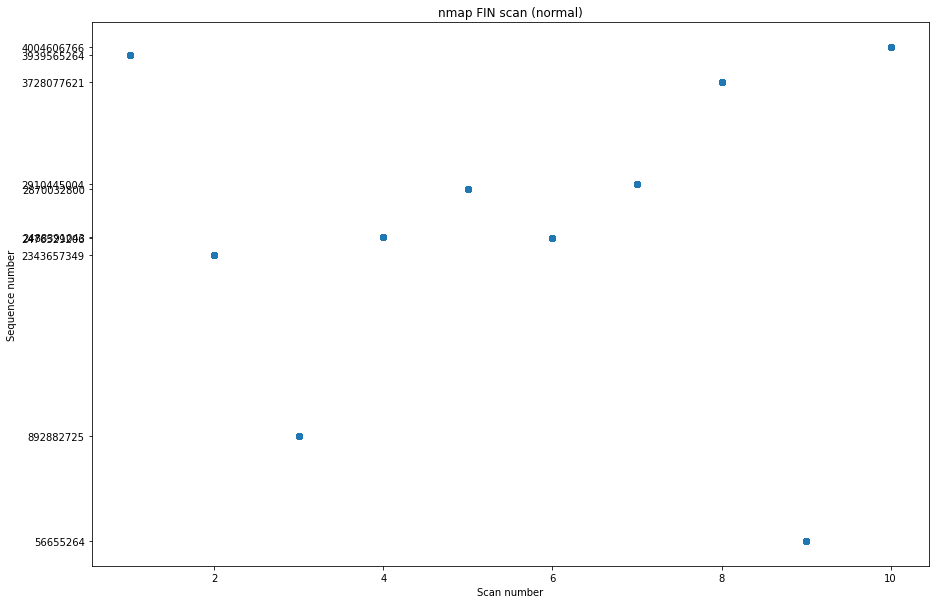

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

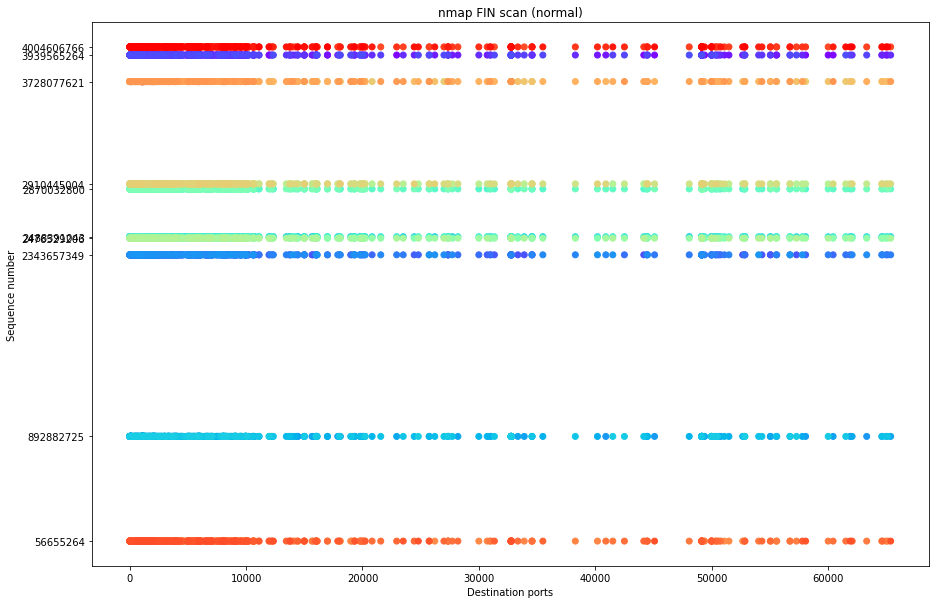

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

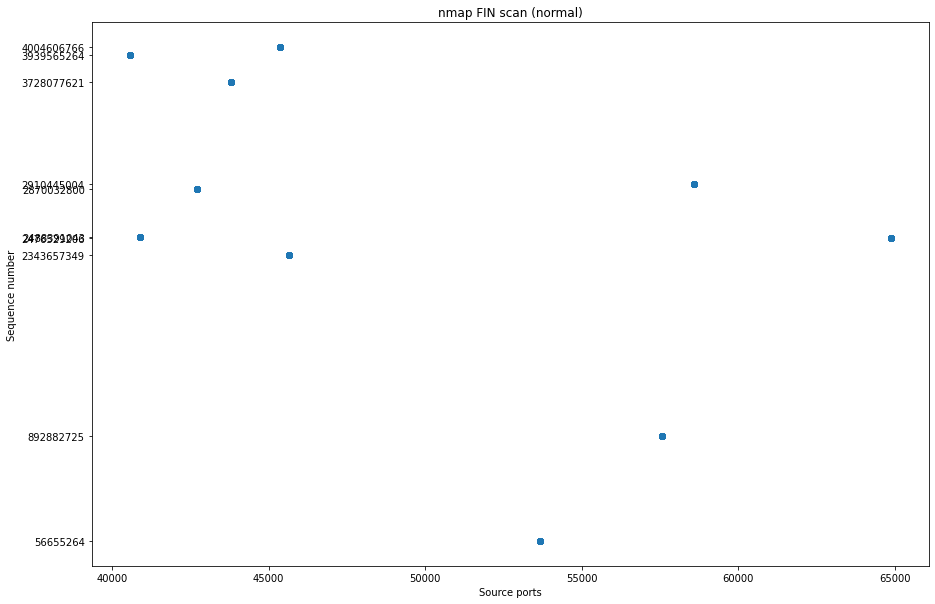

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()

In [37]:
len(set(orders_port['sport']))

10

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
-----
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flag

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F